## Statistics Practical Implementation
### Measure Of Central Tendency

1. Mean
2. Median
3. Mode

In [1]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [2]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [3]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [4]:
import statistics
statistics.mode(ages)

32

### Outliers:

<Axes: >

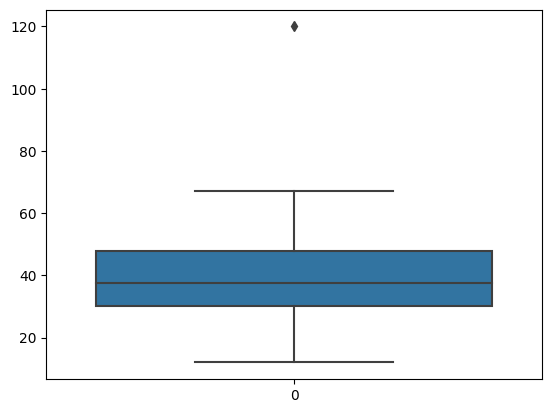

In [5]:
import seaborn as sns
sns.boxplot(ages)

## 5 Number Summary

In [6]:
import numpy as np
q1,q3=np.percentile(ages,[25,75])

In [7]:
print(q1,q3)

30.0 47.75


In [8]:
## to check outlier[Lower Fence- Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


## Measure Of Dispersion

1. Variance
2. Standard Deviation

In [9]:
statistics.variance(ages)

795.2954545454545

In [10]:
np.var(ages,axis=0)

729.0208333333334

In [11]:
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance



In [12]:
variance(ages)

795.2954545454545

In [13]:
def variance(data,dof=0):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance


In [14]:
variance(ages,dof=1)

795.2954545454545

In [15]:
statistics.pvariance(ages)

729.0208333333334

In [16]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

## Histograms And PDF

<Axes: ylabel='Count'>

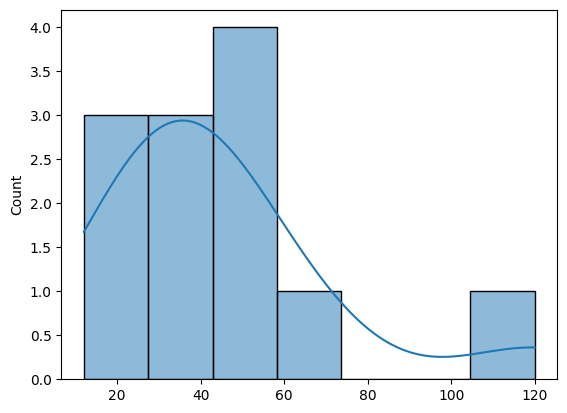

In [17]:
import seaborn as sns
sns.histplot(ages,kde=True)

In [18]:
df=sns.load_dataset('iris')

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

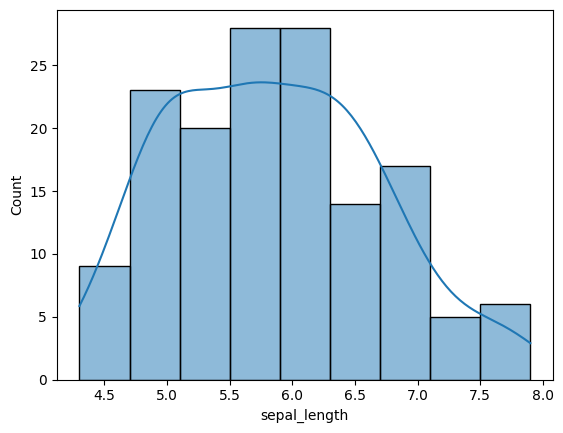

In [20]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

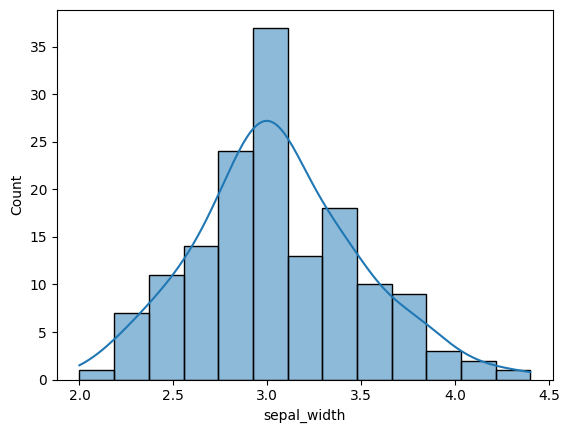

In [21]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

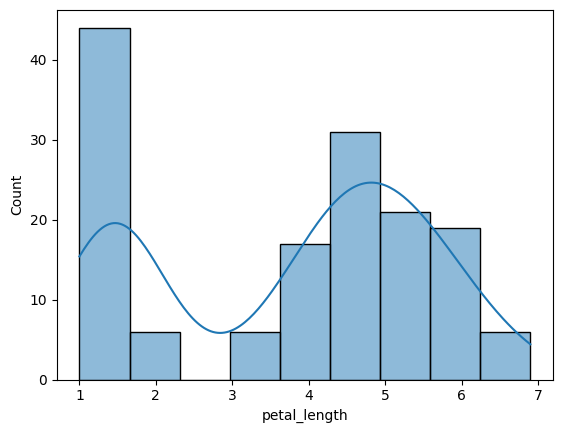

In [22]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

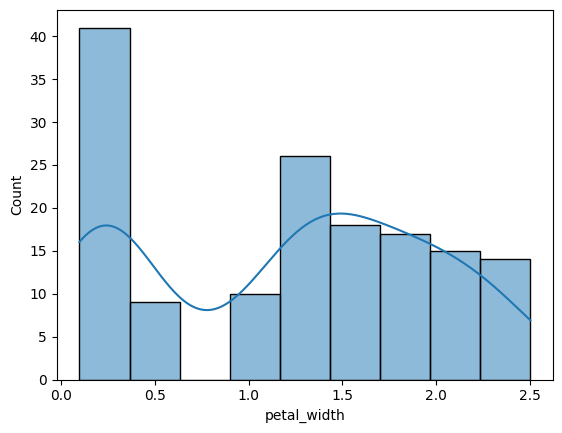

In [23]:
sns.histplot(df['petal_width'],kde=True)

In [24]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)

In [25]:
s

array([ 0.32138689,  0.72915357,  0.4554268 ,  0.4434057 ,  0.51454978,
        0.40848539,  0.50605266,  0.56612147,  0.43923937,  0.30134774,
        0.3246434 ,  0.27643987,  0.89092499,  0.42945201,  0.50574828,
        0.36026814,  0.56449137,  0.7383974 ,  0.60468008,  0.53595382,
        0.67771012,  0.6566226 ,  0.60214247,  0.36726773,  0.43030497,
        0.56879753,  0.21353405,  0.68295157,  0.38113105,  0.49861701,
        0.5491844 ,  0.3999164 ,  0.4872343 ,  0.70024748,  0.41943092,
        0.59119658,  0.69979317,  0.4654084 ,  0.47647304,  0.89047331,
        0.52646189,  0.20143897,  0.64254231,  0.72859001,  0.17072947,
        0.42006879,  0.61483517,  0.48550168,  0.65773942,  0.58290127,
        0.45755382,  0.33402607,  0.27155513,  0.09567518,  0.50681089,
        0.38846907,  0.58116226,  0.73841747,  0.5269263 ,  0.66966085,
        0.69254456,  0.2634875 ,  0.56973523,  0.41242986,  0.51688503,
        0.72305238,  0.24833559,  0.59036475,  0.3440341 ,  0.74

<Axes: ylabel='Count'>

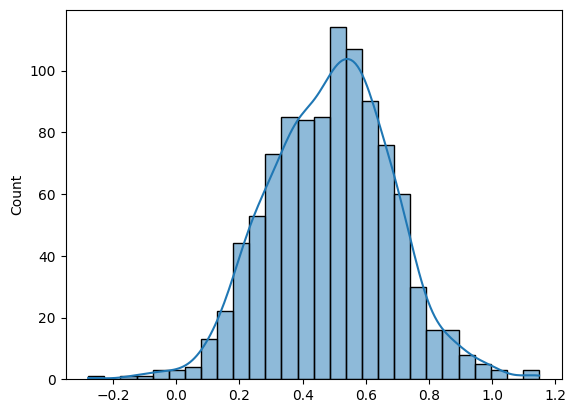

In [26]:
sns.histplot(s,kde=True)

## Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [27]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

<Axes: ylabel='Count'>

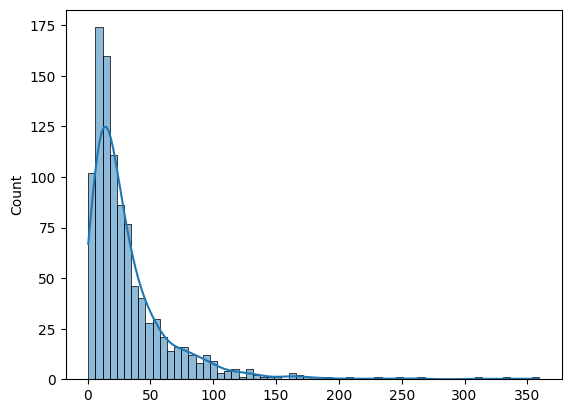

In [28]:
sns.histplot(s,kde=True)

<Axes: ylabel='Count'>

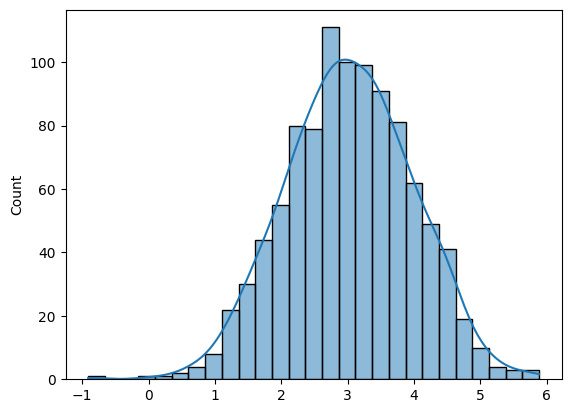

In [29]:
sns.histplot(np.log(s),kde=True)

## Check whether Disstribution is Normal Distribution

In [30]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


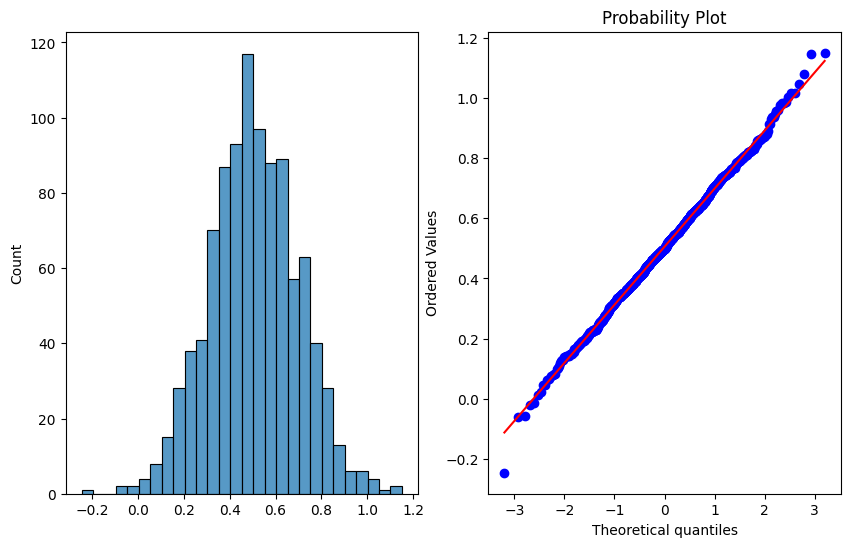

In [31]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

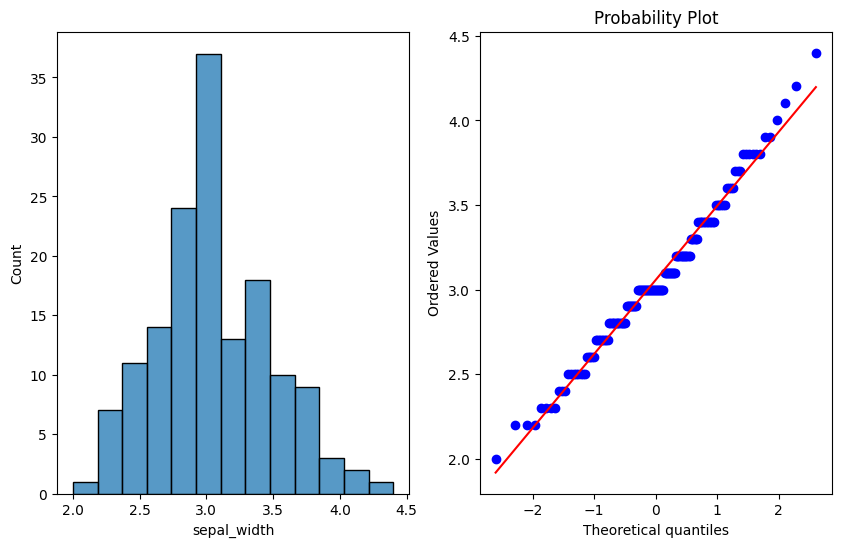

In [32]:
plot_data(df['sepal_width'])

In [33]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [34]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

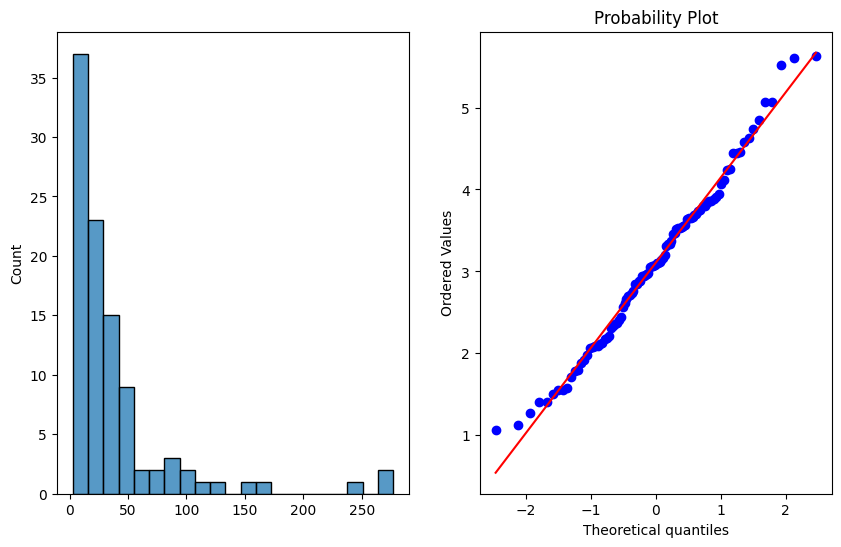

In [35]:
plot_data_log(sample)

##Pearson and Sperman Rank Correlation

In [36]:
df=sns.load_dataset('tips')

In [37]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
import pandas as pd

In [39]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


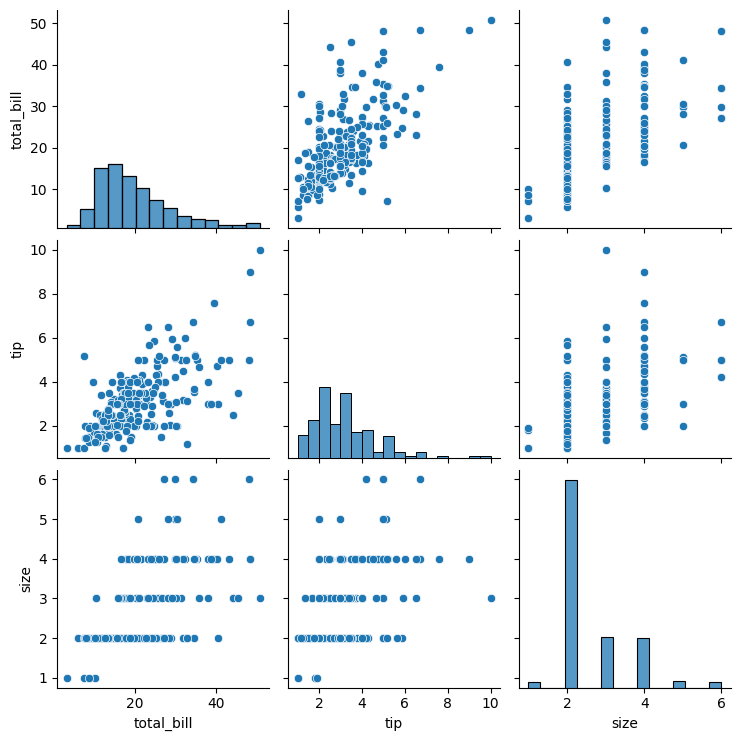

In [40]:
sns.pairplot(df)